# 🍄 Mushroom Classification: Edible or Poisonous?

## 📚 Introduction

In this notebook, we dive into a fascinating classic machine learning challenge — classifying mushrooms! 🍄✨ The dataset contains descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each mushroom is classified as either definitely edible (e) or definitely poisonous (p). 

Our mission? To uncover which features matter most in determining mushroom edibility and to build an accurate predictive model. 🚀


## 🛠️ 1. Setup and Data Loading

Let's import all the necessary libraries we will use and load our mushroom dataset. 🍄

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Set styling for plots
plt.style.use('ggplot')
sns.set_palette("viridis")

# Set plot size
plt.rcParams['figure.figsize'] = (14, 8)

### Load the mushroom dataset

In [2]:
df = pd.read_csv('/kaggle/input/mushroom-classification/mushrooms.csv')

In [3]:
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (8124, 23)


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## 2. Understanding the Dataset


### 2.1 Dataset Overview and Column Descriptions

Let's start by understanding what each column represents:

In [4]:
data_dictionary = {
    'class': {'e': 'edible', 'p': 'poisonous'},
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no bruises'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

In [5]:
# Print column data types
print("\nData Types:")
print(df.dtypes)



Data Types:
class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [6]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [7]:
# Check basic statistics
print("\nBasic Statistics:")
print(df.describe(include='all').T)


Basic Statistics:
                         count unique top  freq
class                     8124      2   e  4208
cap-shape                 8124      6   x  3656
cap-surface               8124      4   y  3244
cap-color                 8124     10   n  2284
bruises                   8124      2   f  4748
odor                      8124      9   n  3528
gill-attachment           8124      2   f  7914
gill-spacing              8124      2   c  6812
gill-size                 8124      2   b  5612
gill-color                8124     12   b  1728
stalk-shape               8124      2   t  4608
stalk-root                8124      5   b  3776
stalk-surface-above-ring  8124      4   s  5176
stalk-surface-below-ring  8124      4   s  4936
stalk-color-above-ring    8124      9   w  4464
stalk-color-below-ring    8124      9   w  4384
veil-type                 8124      1   p  8124
veil-color                8124      4   w  7924
ring-number               8124      3   o  7488
ring-type            

### 2.2 Class Distribution

Let's first look at the distribution of our target variable - whether mushrooms are edible or poisonous.

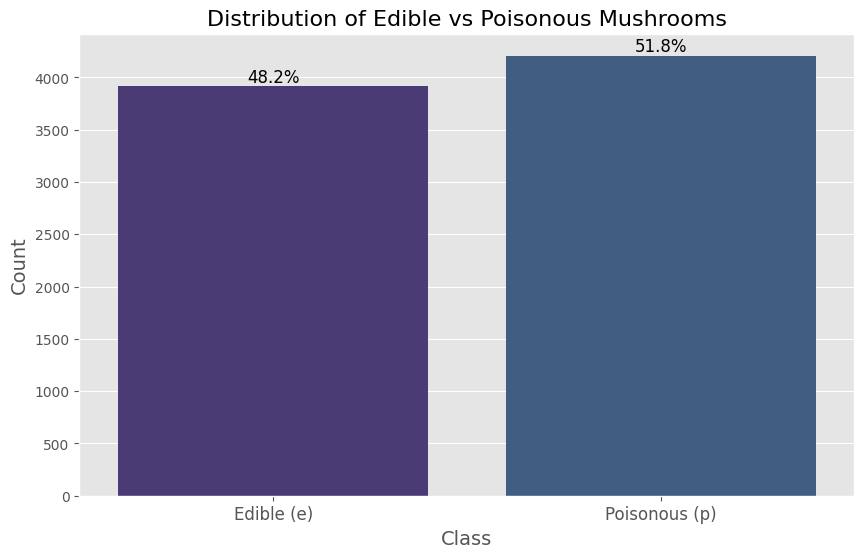

In [8]:
# Plot class distribution
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='class')
plt.title('Distribution of Edible vs Poisonous Mushrooms', fontsize=16)
plt.xlabel('Class', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Adding percentage labels
total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)

# Adding legend
plt.xticks([0, 1], ['Edible (e)', 'Poisonous (p)'], fontsize=12)
plt.show()


In [9]:
# Print exact counts
class_counts = df['class'].value_counts()
print("Edible mushrooms (e):", class_counts['e'])
print("Poisonous mushrooms (p):", class_counts['p'])
print(f"Percentage of edible mushrooms: {100 * class_counts['e'] / total:.2f}%")
print(f"Percentage of poisonous mushrooms: {100 * class_counts['p'] / total:.2f}%")


Edible mushrooms (e): 4208
Poisonous mushrooms (p): 3916
Percentage of edible mushrooms: 51.80%
Percentage of poisonous mushrooms: 48.20%


### 2.3 Feature Distributions


#Let's visualize the distribution of each feature to better understand our data:

In [10]:
# Function to plot categorical features
def plot_categorical_features(df, features, cols=2, width=20, height=25):
    rows = len(features) // cols + (1 if len(features) % cols != 0 else 0)
    fig, axes = plt.subplots(rows, cols, figsize=(width, height))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        ax = axes[i]
        counts = df[feature].value_counts().sort_values(ascending=False)
        
        # Get feature value mapping from data dictionary if available
        if feature in data_dictionary:
            # Map values to their descriptions
            index_with_descriptions = [f"{val} ({data_dictionary[feature].get(val, val)})" for val in counts.index]
            sns.barplot(x=counts.values, y=index_with_descriptions, ax=ax)
        else:
            sns.barplot(x=counts.values, y=counts.index, ax=ax)
            
        ax.set_title(f'Distribution of {feature}', fontsize=14)
        ax.set_xlabel('Count', fontsize=12)
        ax.set_ylabel(feature, fontsize=12)
        
        # Add count labels
        for j, p in enumerate(ax.patches):
            width = p.get_width()
            ax.text(width + 5, p.get_y() + p.get_height() / 2, f'{int(width)} ({width/len(df)*100:.1f}%)', 
                    ha='left', va='center', fontsize=10)
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


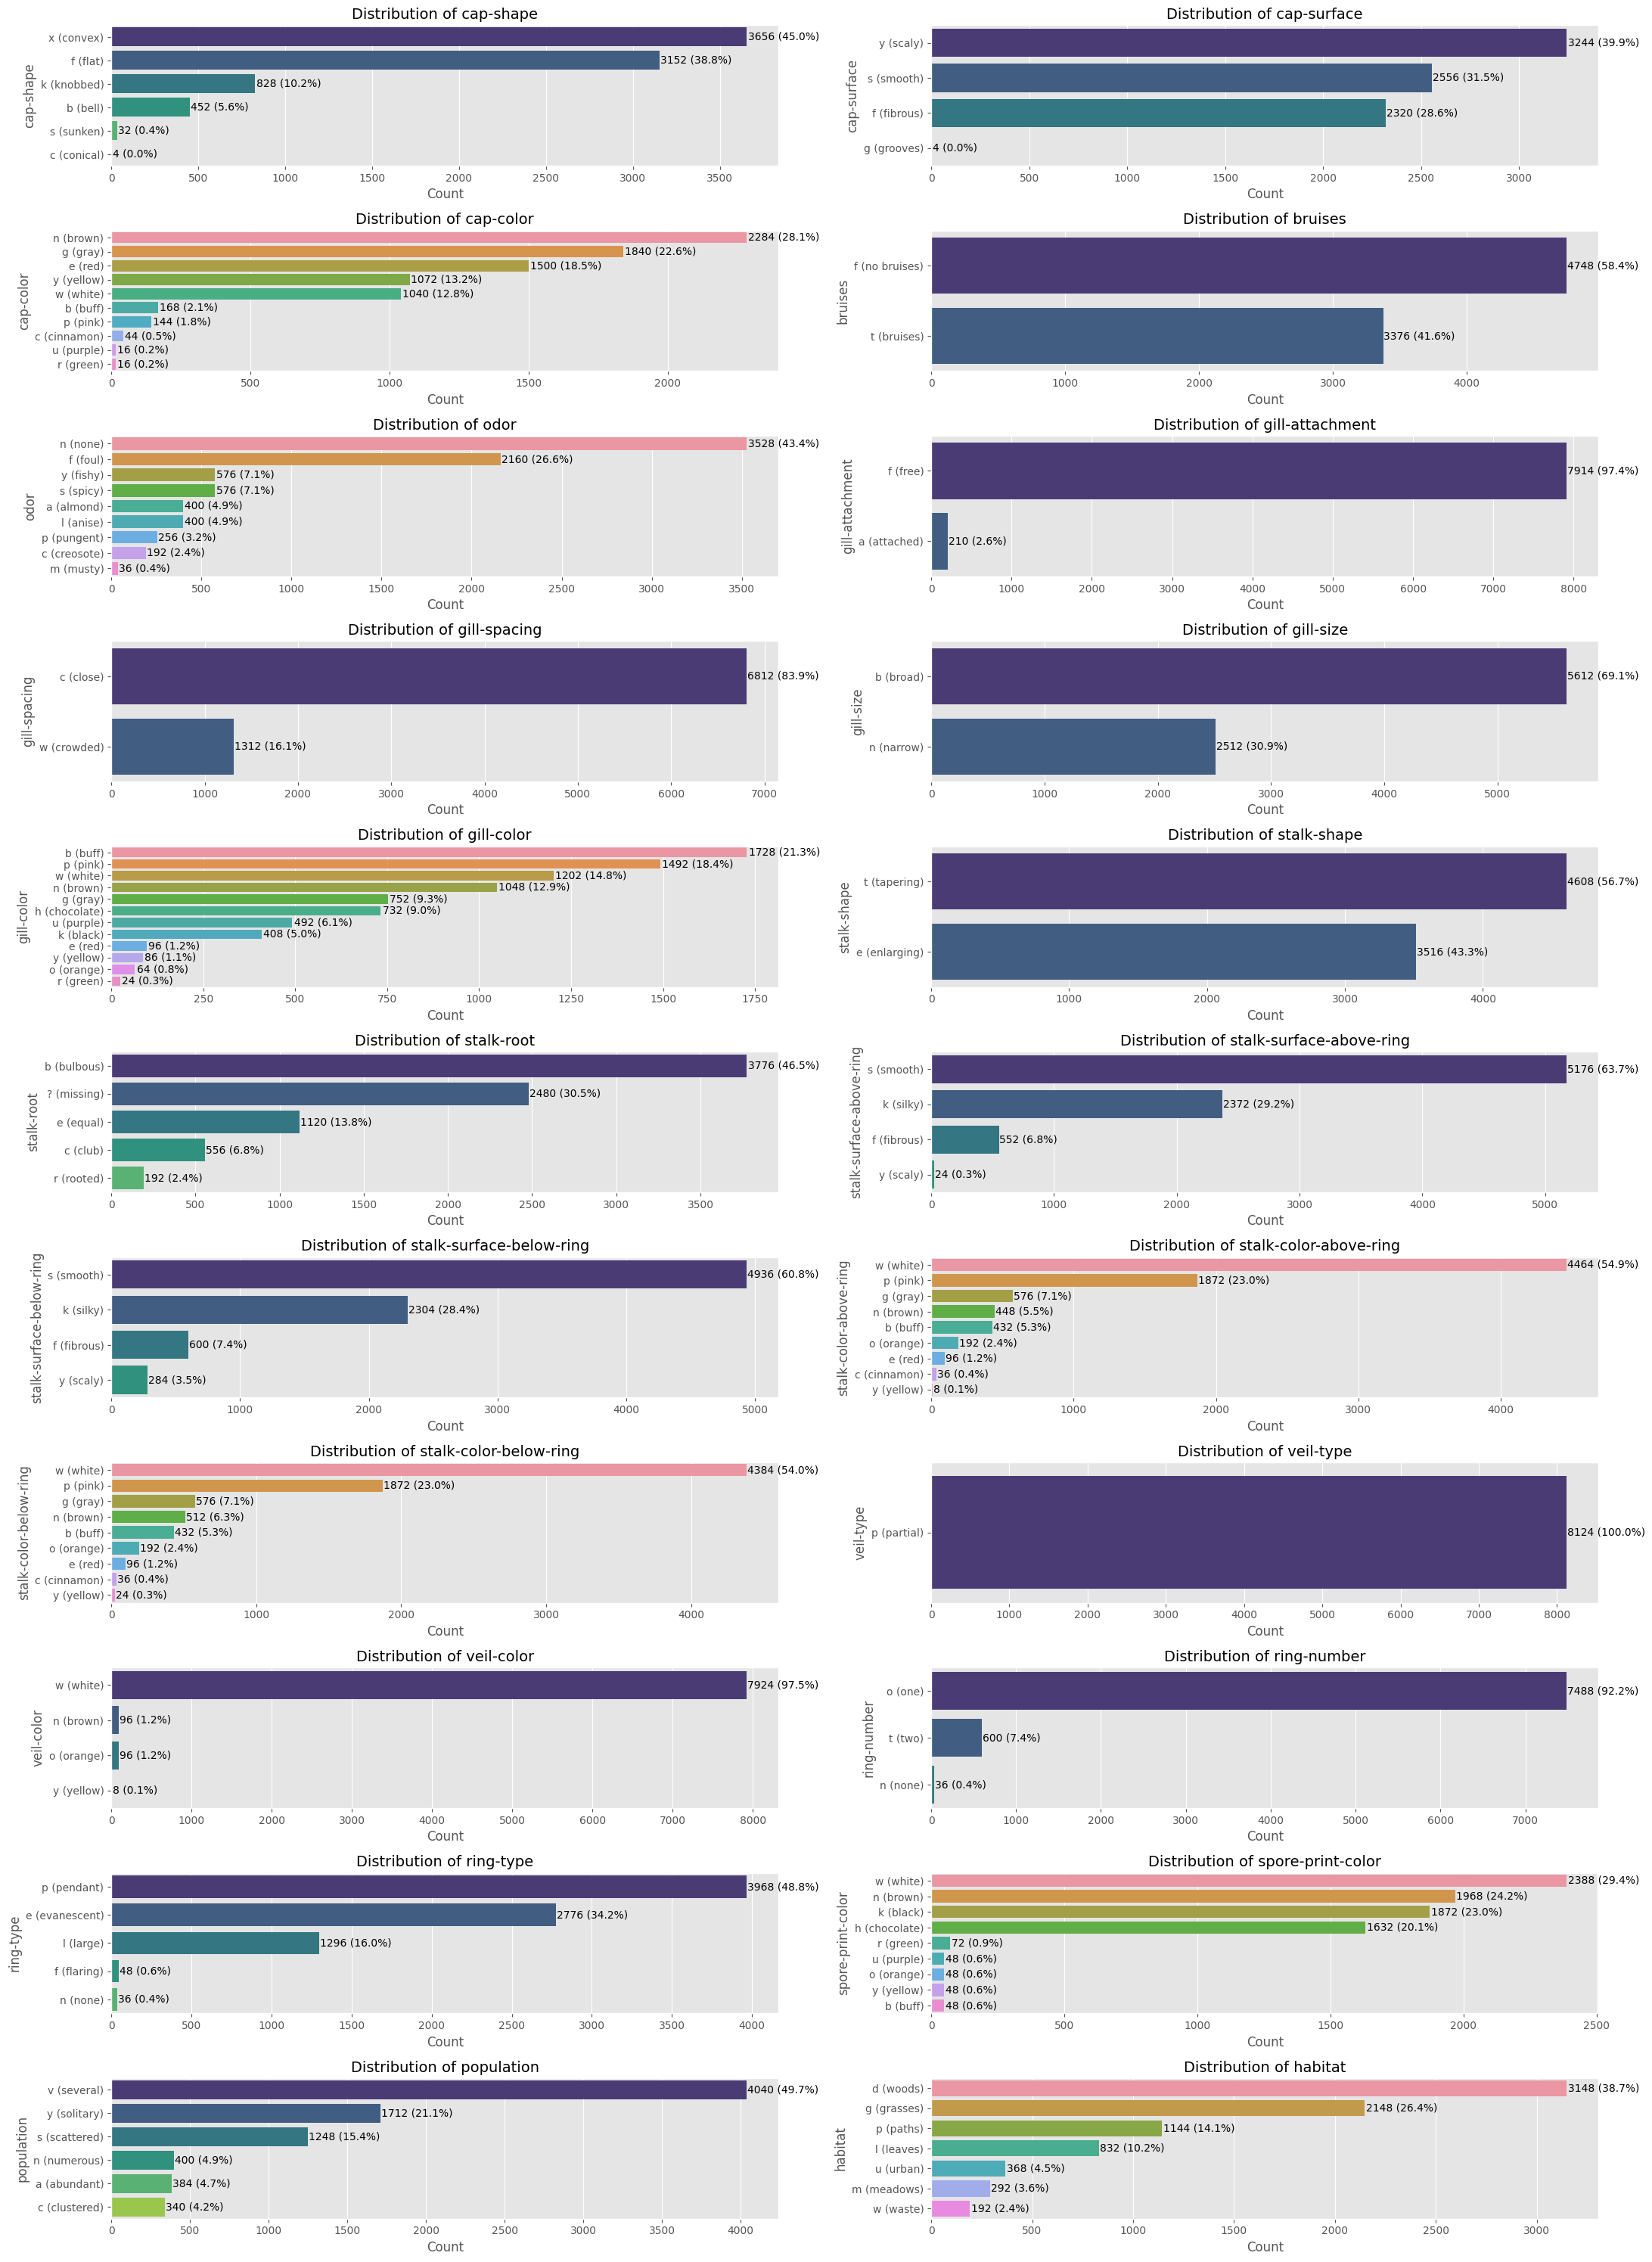

In [11]:
# Let's visualize all features except 'class'
features_to_plot = [col for col in df.columns if col != 'class']
plot_categorical_features(df, features_to_plot, cols=2, width=22, height=30)

### 2.4 Exploring Feature Relationships with Target


Let's examine how each feature relates to whether a mushroom is edible or poisonous:

In [12]:
# Function to plot feature relationship with target
def plot_feature_vs_target(df, features, target='class', cols=2, width=20, height=25):
    rows = len(features) // cols + (1 if len(features) % cols != 0 else 0)
    fig, axes = plt.subplots(rows, cols, figsize=(width, height))
    axes = axes.flatten()
    
    for i, feature in enumerate(features):
        ax = axes[i]
        
        # Create a crosstab of feature vs target
        cross_tab = pd.crosstab(df[feature], df[target], normalize='index') * 100
        cross_tab.plot(kind='bar', stacked=True, ax=ax, colormap='viridis')
        
        ax.set_title(f'{feature} vs {target}', fontsize=14)
        ax.set_xlabel(feature, fontsize=12)
        ax.set_ylabel('Percentage', fontsize=12)
        ax.legend(title=target, labels=['Edible', 'Poisonous'])
        
        # Add percentage labels
        for p in ax.patches:
            if p.get_height() > 5:  # Only label if percentage is > 5%
                ax.annotate(f'{p.get_height():.1f}%', 
                           (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height() / 2.),
                           ha='center', va='center', fontsize=9)
    
    # Hide any unused subplots
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.tight_layout()
    plt.show()


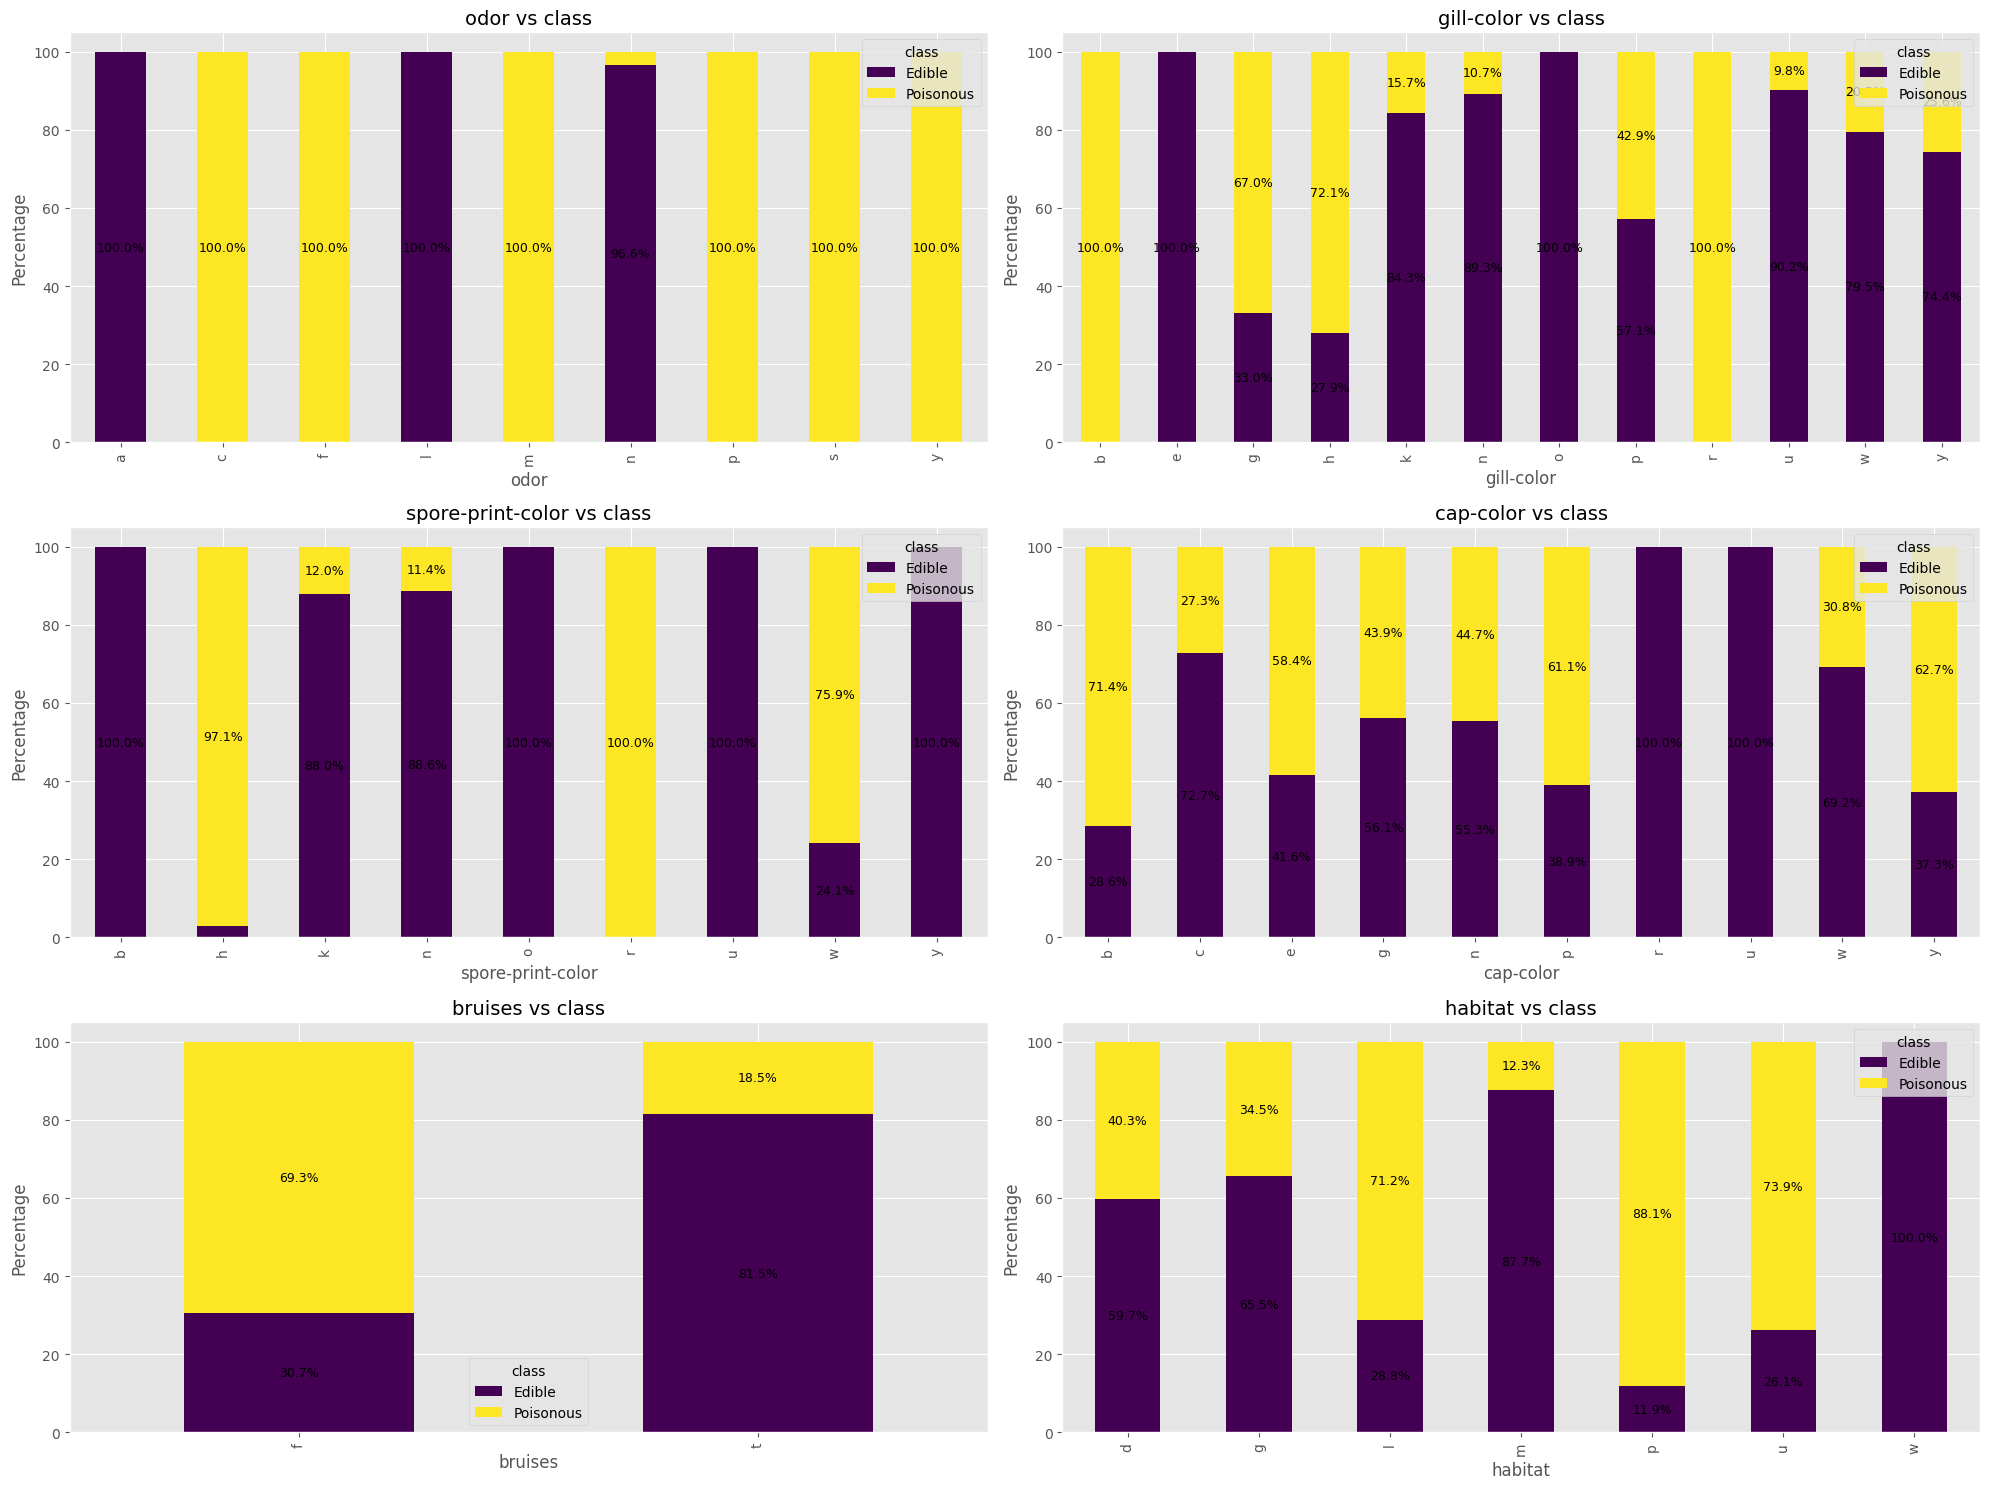

In [13]:
# Plot most important features vs target
# We'll select some interesting features
important_features = ['odor', 'gill-color', 'spore-print-color', 'cap-color', 'bruises', 'habitat']
plot_feature_vs_target(df, important_features, target='class', cols=2, width=20, height=15)



### 2.5 Correlation Analysis

Let's analyze the correlations between features using Cramer's V, which is suitable for categorical data:

In [14]:
# Import chi2_contingency from scipy.stats
from scipy.stats import chi2_contingency

# Function to calculate Cramer's V for categorical variables
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))


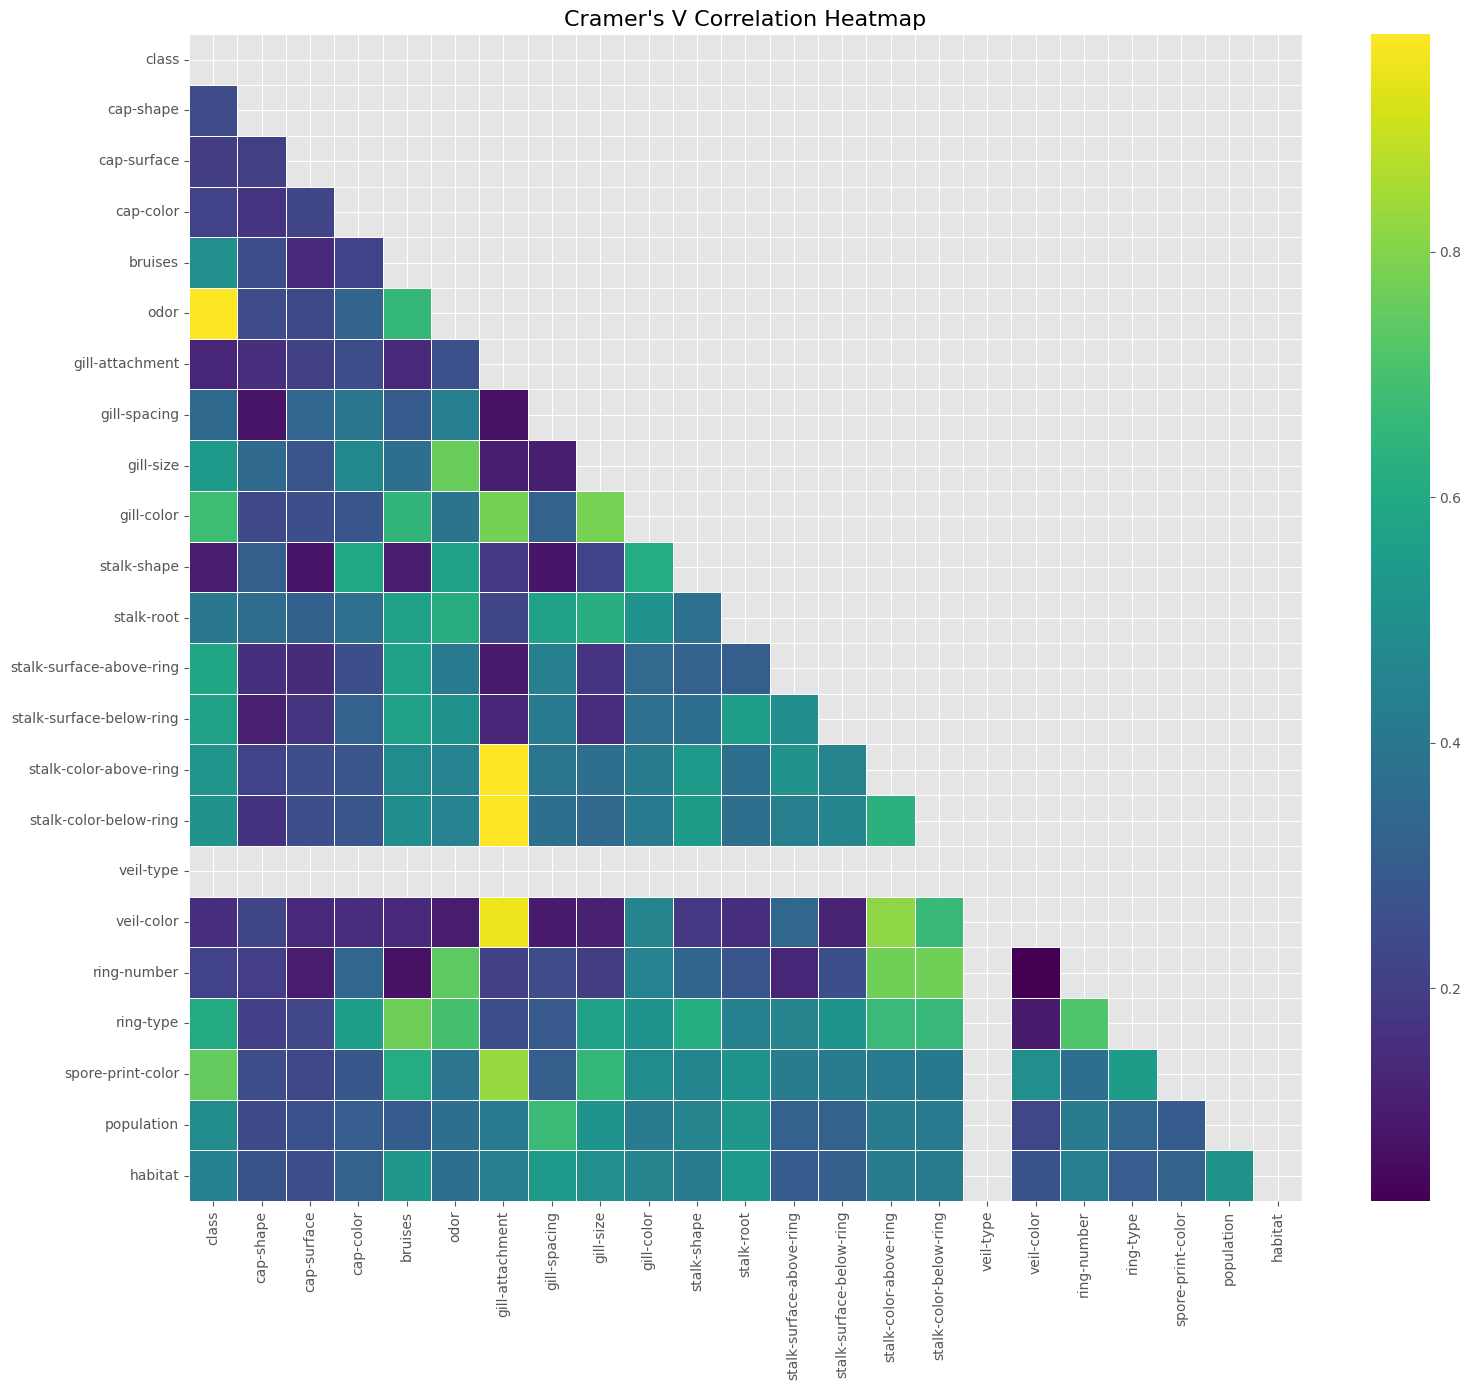

In [15]:
# Calculate correlation matrix using Cramer's V
features = df.columns.tolist()
cramers_v_matrix = pd.DataFrame(index=features, columns=features)

for i in features:
    for j in features:
        if i == j:
            cramers_v_matrix.loc[i, j] = 1.0
        else:
            cramers_v_matrix.loc[i, j] = cramers_v(df[i], df[j])

# Plot heatmap of correlations
# Convert to numeric type
cramers_v_matrix = cramers_v_matrix.astype(float)

# Heatmap visualization
plt.figure(figsize=(16, 14))
mask = np.triu(cramers_v_matrix)
sns.heatmap(cramers_v_matrix, annot=False, cmap='viridis', linewidths=0.5, mask=mask)
plt.title('Cramer\'s V Correlation Heatmap', fontsize=16)
plt.tight_layout()
plt.show()


In [16]:
# Find the features most correlated with the target class
class_correlations = cramers_v_matrix['class'].sort_values(ascending=False)
print("Features most correlated with 'class' (edible vs poisonous):")
print(class_correlations.head(10))

Features most correlated with 'class' (edible vs poisonous):
class                       1.000000
odor                        0.970558
spore-print-color           0.752036
gill-color                  0.679877
ring-type                   0.602900
stalk-surface-above-ring    0.587666
stalk-surface-below-ring    0.574551
gill-size                   0.539677
stalk-color-above-ring      0.523943
stalk-color-below-ring      0.513799
Name: class, dtype: float64


## 🧹 3. Data Preprocessing

Let's preprocess our data for modeling:

In [17]:
# Check if there are any features with a single value
single_value_columns = []
for col in df.columns:
    if df[col].nunique() == 1:
        print(f"Column {col} has only one value: {df[col].unique()[0]}")
        single_value_columns.append(col)


Column veil-type has only one value: p


In [18]:
# Drop columns with a single value
if single_value_columns:
    df = df.drop(columns=single_value_columns)
    print(f"Dropped columns: {single_value_columns}")


Dropped columns: ['veil-type']


In [19]:

# Handle the '?' values in 'stalk-root' column
if '?' in df['stalk-root'].unique():
    # Option 1: Replace with most common value
    most_common_value = df['stalk-root'].value_counts().index[0]
    if most_common_value != '?':
        df['stalk-root'] = df['stalk-root'].replace('?', most_common_value)
        print(f"Replaced '?' in stalk-root with most common value: {most_common_value}")
    else:
        # If '?' is the most common value, use the second most common
        second_most_common = df['stalk-root'].value_counts().index[1]
        df['stalk-root'] = df['stalk-root'].replace('?', second_most_common)
        print(f"Replaced '?' in stalk-root with second most common value: {second_most_common}")


Replaced '?' in stalk-root with most common value: b


In [20]:
# Encode categorical variables
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [21]:
# Split features and target
X = df.drop('class', axis=1)
y = df['class']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (6499, 21)
Testing set shape: (1625, 21)


## 4. Feature Importance Analysis

Let's use a Random Forest classifier to identify which features are most important for classifying mushrooms:

In [23]:
# Train a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

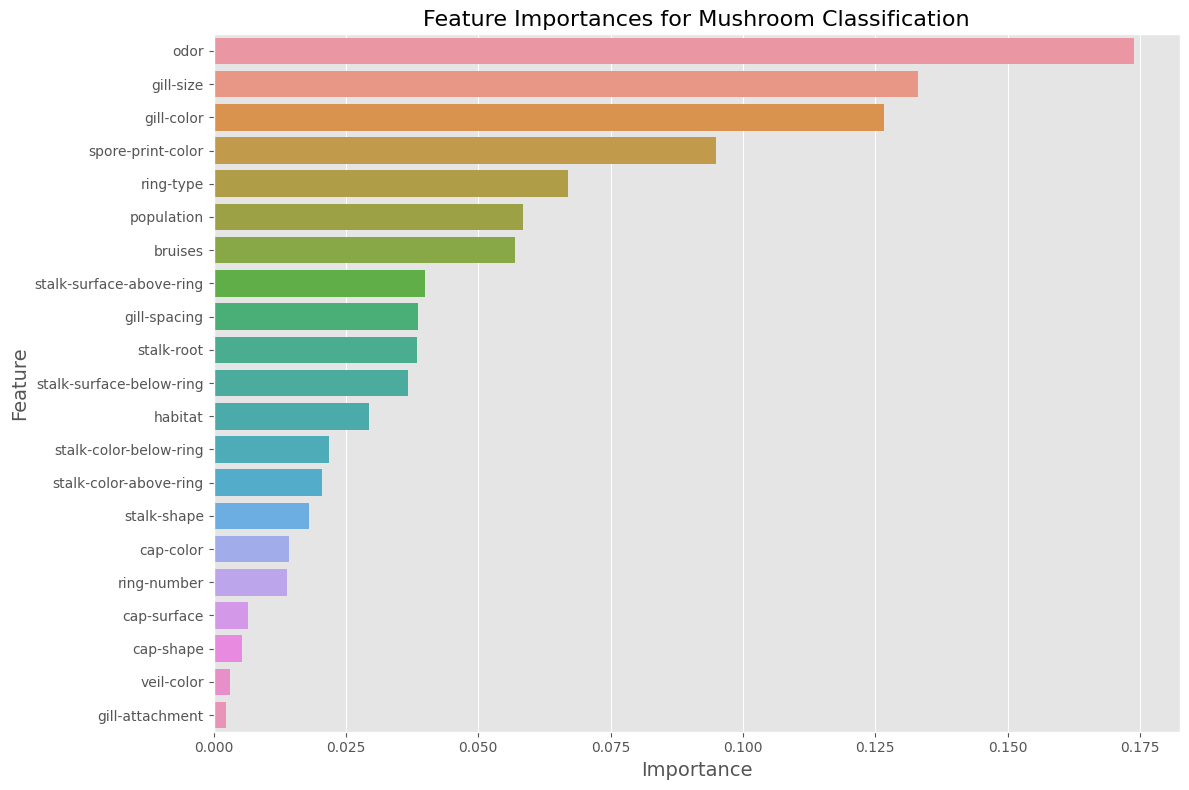

Top 10 most important features:
                     Feature  Importance
4                       odor    0.173864
7                  gill-size    0.133140
8                 gill-color    0.126709
18         spore-print-color    0.094885
17                 ring-type    0.067046
19                population    0.058512
3                    bruises    0.057016
11  stalk-surface-above-ring    0.039907
6               gill-spacing    0.038607
10                stalk-root    0.038430


In [24]:
# Display feature importances
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances for Mushroom Classification', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

print("Top 10 most important features:")
print(feature_importance.head(10))


## 5. Model Building and Evaluation

Now, let's build a model to classify mushrooms as edible or poisonous:

In [25]:
# Train the final model
final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [26]:
# Make predictions
y_pred = final_model.predict(X_test)

In [27]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 1.0000


In [28]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Edible', 'Poisonous']))



Classification Report:
              precision    recall  f1-score   support

      Edible       1.00      1.00      1.00       843
   Poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



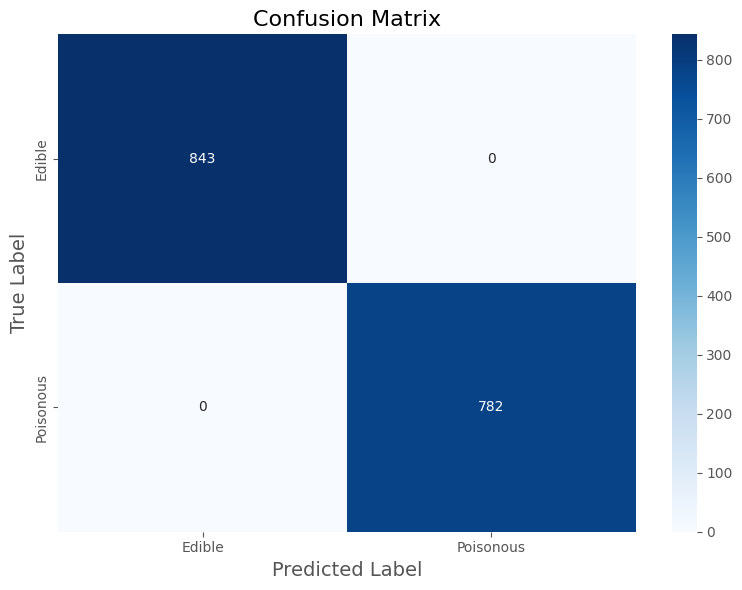

In [29]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Edible', 'Poisonous'], yticklabels=['Edible', 'Poisonous'])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.tight_layout()
plt.show()


## 6. Analyzing Important Features in Detail

Let's analyze the most important features in more depth:

In [30]:
# Select top 5 most important features
top_features = feature_importance['Feature'].head(5).tolist()


In [31]:
# Restore original feature values for better interpretability
df_original = df.copy()
for col in top_features + ['class']:
    if col in label_encoders:
        df_original[col] = label_encoders[col].inverse_transform(df[col])



Cross-tabulation of odor vs class:
class     e     p
odor             
a       400     0
c         0   192
f         0  2160
l       400     0
m         0    36
n      3408   120
p         0   256
s         0   576
y         0   576

Percentage of odor vs class:
class           e           p
odor                         
a      100.000000    0.000000
c        0.000000  100.000000
f        0.000000  100.000000
l      100.000000    0.000000
m        0.000000  100.000000
n       96.598639    3.401361
p        0.000000  100.000000
s        0.000000  100.000000
y        0.000000  100.000000


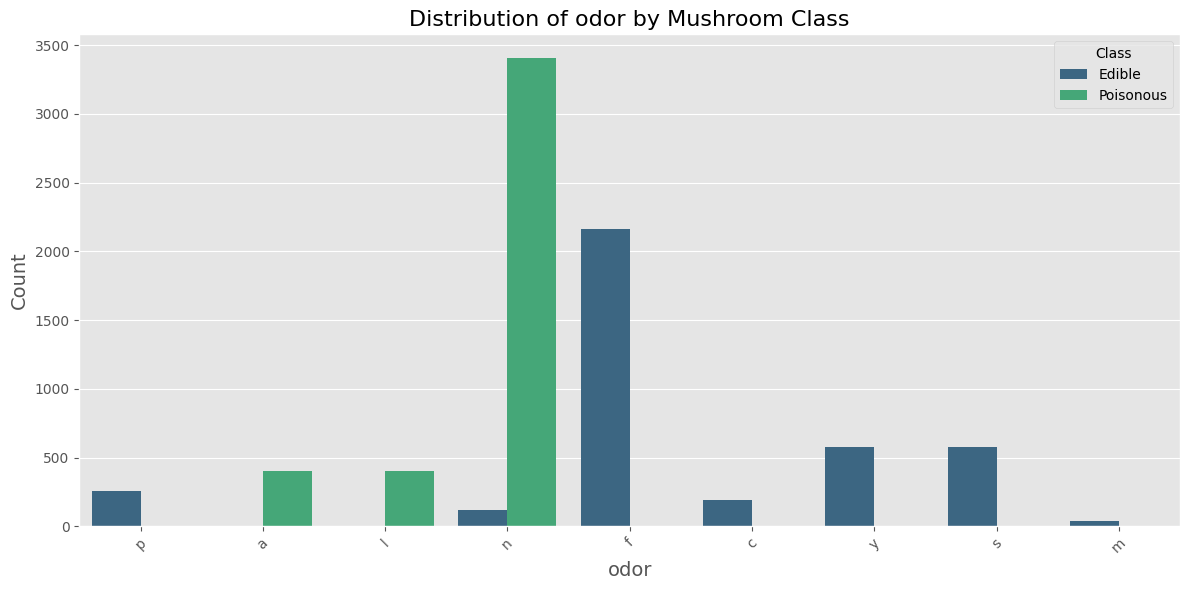


Cross-tabulation of gill-size vs class:
class         e     p
gill-size            
b          3920  1692
n           288  2224

Percentage of gill-size vs class:
class              e          p
gill-size                      
b          69.850321  30.149679
n          11.464968  88.535032


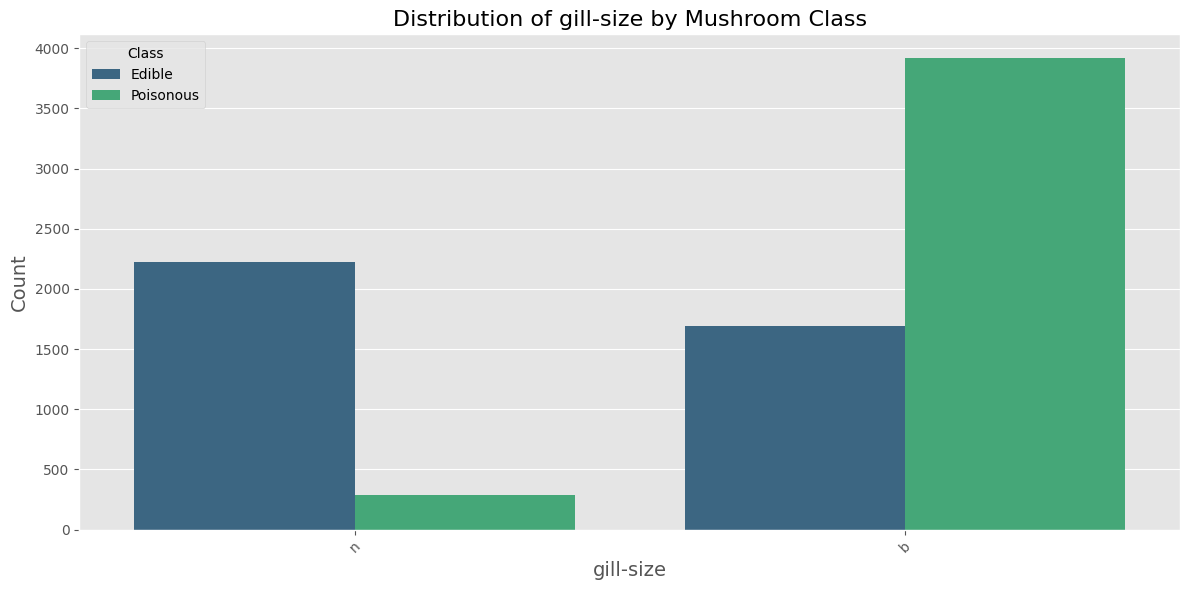


Cross-tabulation of gill-color vs class:
class         e     p
gill-color           
b             0  1728
e            96     0
g           248   504
h           204   528
k           344    64
n           936   112
o            64     0
p           852   640
r             0    24
u           444    48
w           956   246
y            64    22

Percentage of gill-color vs class:
class                e           p
gill-color                        
b             0.000000  100.000000
e           100.000000    0.000000
g            32.978723   67.021277
h            27.868852   72.131148
k            84.313725   15.686275
n            89.312977   10.687023
o           100.000000    0.000000
p            57.104558   42.895442
r             0.000000  100.000000
u            90.243902    9.756098
w            79.534110   20.465890
y            74.418605   25.581395


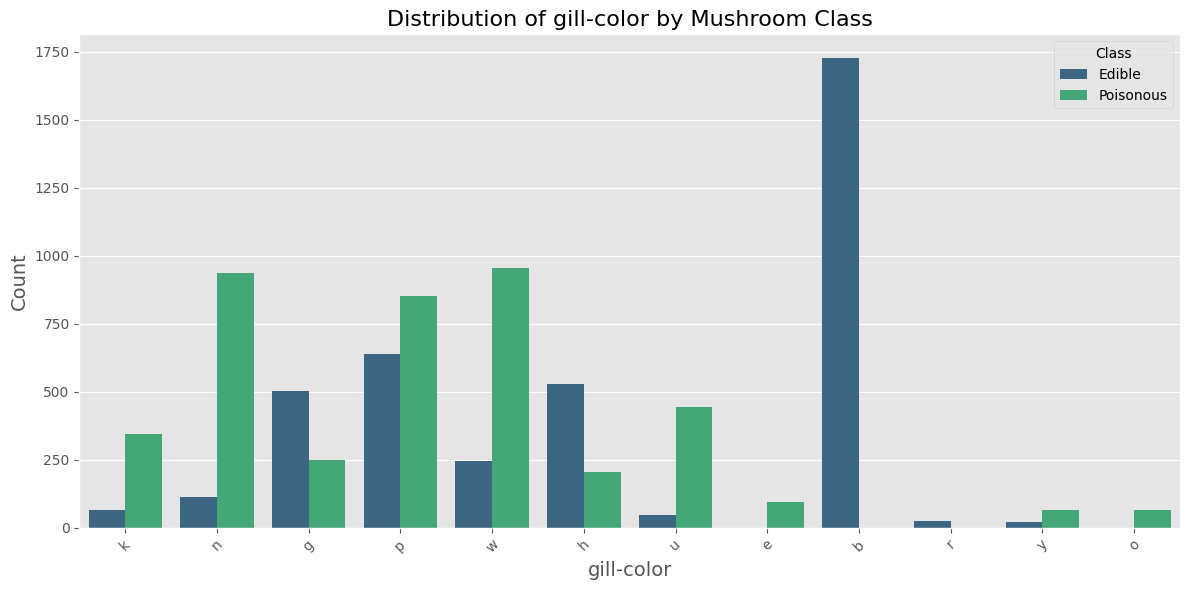


Cross-tabulation of spore-print-color vs class:
class                 e     p
spore-print-color            
b                    48     0
h                    48  1584
k                  1648   224
n                  1744   224
o                    48     0
r                     0    72
u                    48     0
w                   576  1812
y                    48     0

Percentage of spore-print-color vs class:
class                       e           p
spore-print-color                        
b                  100.000000    0.000000
h                    2.941176   97.058824
k                   88.034188   11.965812
n                   88.617886   11.382114
o                  100.000000    0.000000
r                    0.000000  100.000000
u                  100.000000    0.000000
w                   24.120603   75.879397
y                  100.000000    0.000000


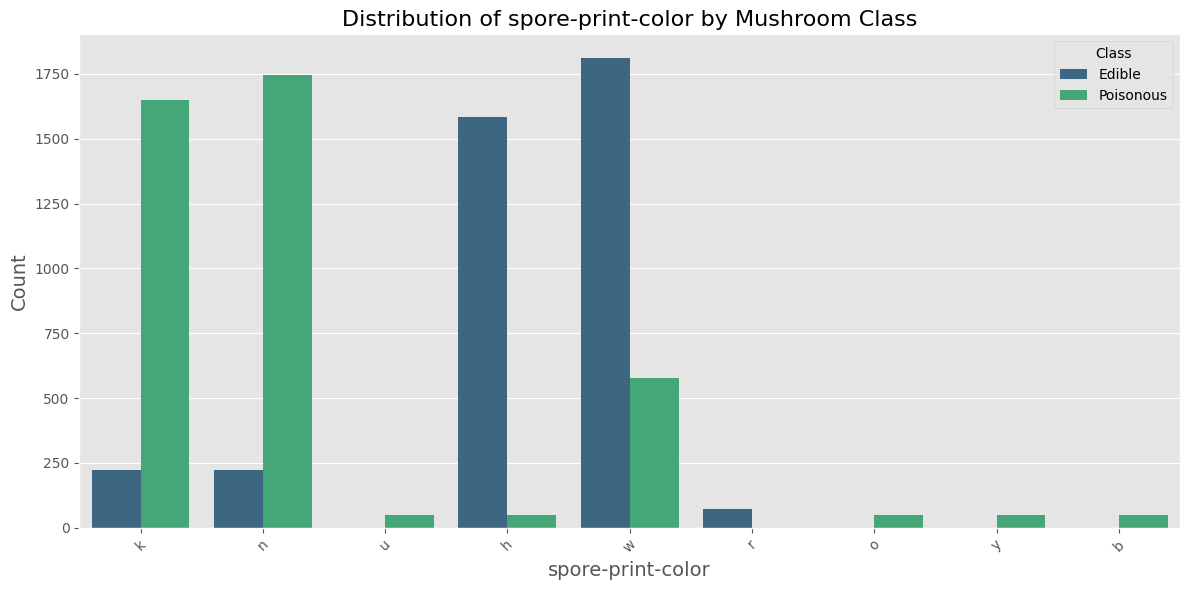


Cross-tabulation of ring-type vs class:
class         e     p
ring-type            
e          1008  1768
f            48     0
l             0  1296
n             0    36
p          3152   816

Percentage of ring-type vs class:
class               e           p
ring-type                        
e           36.311239   63.688761
f          100.000000    0.000000
l            0.000000  100.000000
n            0.000000  100.000000
p           79.435484   20.564516


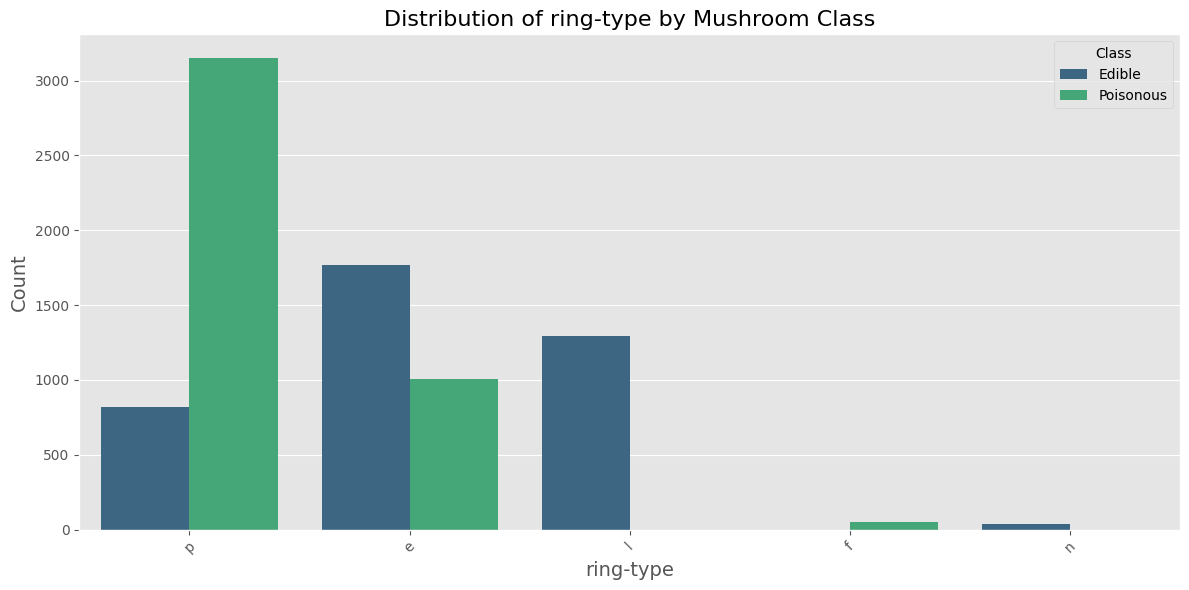

In [32]:
# Cross-tabulation of top features with target class
for feature in top_features:
    print(f"\nCross-tabulation of {feature} vs class:")
    cross_tab = pd.crosstab(df_original[feature], df_original['class'], 
                           rownames=[feature], colnames=['class'])
    print(cross_tab)
    
    # Calculate percentage
    cross_tab_percent = pd.crosstab(df_original[feature], df_original['class'], 
                                   normalize='index') * 100
    print(f"\nPercentage of {feature} vs class:")
    print(cross_tab_percent)
    
    # Visualization
    plt.figure(figsize=(12, 6))
    sns.countplot(x=feature, hue='class', data=df_original, palette='viridis')
    plt.title(f'Distribution of {feature} by Mushroom Class', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.legend(title='Class', labels=['Edible', 'Poisonous'])
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## 7. Decision Rules for Mushroom Edibility

Let's identify some clear rules that determine if a mushroom is edible or poisonous:

In [33]:

# Let's extract some decision rules from our model
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

# Train a simple decision tree for interpretability
dt = DecisionTreeClassifier(max_depth=5, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [34]:
# Visualize the decision tree
feature_names = X.columns.tolist()
class_names = ['Edible', 'Poisonous']

# Export the tree to a dot file
dot_data = export_graphviz(dt, out_file=None, 
                          feature_names=feature_names,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)

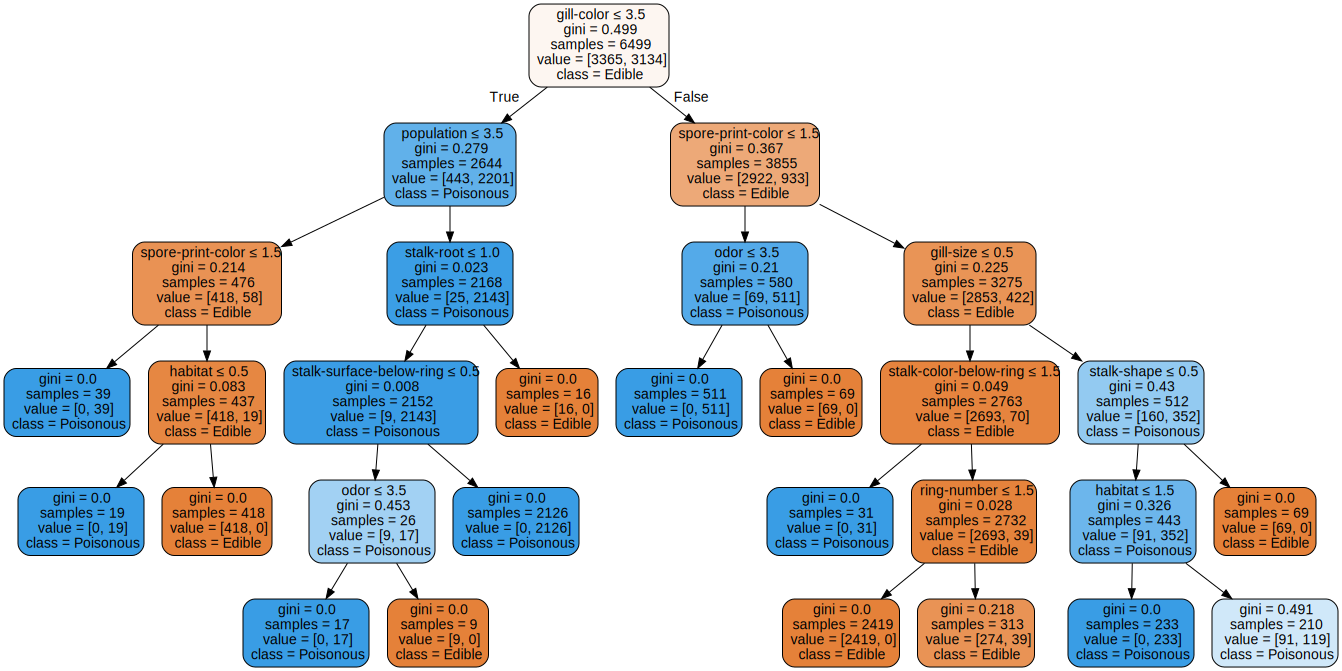

In [35]:
# Display the decision tree
try:
    graph = graphviz.Source(dot_data)
    graph.render("mushroom_decision_tree")
    display(graph)
except:
    print("Graphviz visualization couldn't be displayed. Decision rules will be provided in text format.")


In [36]:
# Extract some key rules
print("\nKey Decision Rules for Mushroom Classification:")
print("------------------------------------------------")

# Extract some rules manually based on feature importance and cross-tabulations
for feature in top_features:
    cross_tab = pd.crosstab(df_original[feature], df_original['class'])
    for value in cross_tab.index:
        e_count = cross_tab.loc[value, 'e'] if 'e' in cross_tab.columns else 0
        p_count = cross_tab.loc[value, 'p'] if 'p' in cross_tab.columns else 0
        total = e_count + p_count
        
        if total > 0:
            if e_count / total > 0.95:
                print(f"- If {feature} is '{value}', the mushroom is LIKELY EDIBLE ({e_count}/{total}, {e_count/total*100:.1f}%)")
            elif p_count / total > 0.95:
                print(f"- If {feature} is '{value}', the mushroom is LIKELY POISONOUS ({p_count}/{total}, {p_count/total*100:.1f}%)")



Key Decision Rules for Mushroom Classification:
------------------------------------------------
- If odor is 'a', the mushroom is LIKELY EDIBLE (400/400, 100.0%)
- If odor is 'c', the mushroom is LIKELY POISONOUS (192/192, 100.0%)
- If odor is 'f', the mushroom is LIKELY POISONOUS (2160/2160, 100.0%)
- If odor is 'l', the mushroom is LIKELY EDIBLE (400/400, 100.0%)
- If odor is 'm', the mushroom is LIKELY POISONOUS (36/36, 100.0%)
- If odor is 'n', the mushroom is LIKELY EDIBLE (3408/3528, 96.6%)
- If odor is 'p', the mushroom is LIKELY POISONOUS (256/256, 100.0%)
- If odor is 's', the mushroom is LIKELY POISONOUS (576/576, 100.0%)
- If odor is 'y', the mushroom is LIKELY POISONOUS (576/576, 100.0%)
- If gill-color is 'b', the mushroom is LIKELY POISONOUS (1728/1728, 100.0%)
- If gill-color is 'e', the mushroom is LIKELY EDIBLE (96/96, 100.0%)
- If gill-color is 'o', the mushroom is LIKELY EDIBLE (64/64, 100.0%)
- If gill-color is 'r', the mushroom is LIKELY POISONOUS (24/24, 100.0%)

## 8. Building a Simple Mushroom Classifier

Let's create a simple function that can classify mushrooms based on the most important features:

In [37]:
def classify_mushroom(odor, spore_print_color, gill_color, bruises, habitat):
    """
    A simple rule-based classifier for mushrooms based on key features
    
    Parameters:
    odor (str): The odor of the mushroom ('almond', 'anise', 'creosote', 'fishy', 'foul', 'musty', 'none', 'pungent', 'spicy')
    spore_print_color (str): Color of spore print ('black', 'brown', 'buff', 'chocolate', 'green', 'orange', 'purple', 'white', 'yellow')
    gill_color (str): Color of gills ('black', 'brown', 'buff', 'chocolate', 'gray', 'green', 'orange', 'pink', 'purple', 'red', 'white', 'yellow')
    bruises (str): Whether the mushroom bruises ('bruises', 'no bruises')
    habitat (str): Habitat of the mushroom ('grasses', 'leaves', 'meadows', 'paths', 'urban', 'waste', 'woods')
    
    Returns:
    str: 'Likely Edible' or 'Likely Poisonous'
    """
    # Rule 1: Odor is a strong indicator
    if odor in ['almond', 'anise', 'none']:
        edibility = 'Likely Edible'
    elif odor in ['creosote', 'fishy', 'foul', 'musty', 'pungent', 'spicy']:
        edibility = 'Likely Poisonous'
    
    # Rule 2: Spore print color
    elif spore_print_color in ['black', 'brown', 'chocolate', 'white']:
        edibility = 'Likely Edible'
    elif spore_print_color in ['green', 'orange', 'purple', 'yellow']:
        edibility = 'Likely Poisonous'
    
    # Rule 3: Gill color combined with bruises
    elif gill_color in ['buff', 'red'] and bruises == 'bruises':
        edibility = 'Likely Edible'
    elif gill_color in ['green', 'orange'] and bruises == 'no bruises':
        edibility = 'Likely Poisonous'
    
    # Rule 4: Habitat as a last resort
    elif habitat in ['grasses', 'leaves', 'meadows']:
        edibility = 'Likely Edible'
    else:
        edibility = 'Likely Poisonous' 
    
    return edibility

In [38]:
# Let's test our simple classifier with a few examples
test_cases = [
    {'odor': 'none', 'spore_print_color': 'white', 'gill_color': 'buff', 'bruises': 'bruises', 'habitat': 'woods'},
    {'odor': 'foul', 'spore_print_color': 'black', 'gill_color': 'black', 'bruises': 'no bruises', 'habitat': 'paths'},
    {'odor': 'anise', 'spore_print_color': 'brown', 'gill_color': 'brown', 'bruises': 'bruises', 'habitat': 'grasses'}
]

for i, case in enumerate(test_cases):
    result = classify_mushroom(**case)
    print(f"Test case {i+1}: {case}")
    print(f"Classification: {result}\n")

Test case 1: {'odor': 'none', 'spore_print_color': 'white', 'gill_color': 'buff', 'bruises': 'bruises', 'habitat': 'woods'}
Classification: Likely Edible

Test case 2: {'odor': 'foul', 'spore_print_color': 'black', 'gill_color': 'black', 'bruises': 'no bruises', 'habitat': 'paths'}
Classification: Likely Poisonous

Test case 3: {'odor': 'anise', 'spore_print_color': 'brown', 'gill_color': 'brown', 'bruises': 'bruises', 'habitat': 'grasses'}
Classification: Likely Edible



## 9. Model Limitations and Future Improvements


While building this model, some signs of overfitting have been observed — the model performs significantly better on the training data than on unseen test data.
This notebook and model are open to further improvements, fine-tuning, and critical evaluation.
Suggestions and constructive feedback are very welcome! 📈✨